In [1]:
import torch
import matplotlib.pyplot as plt
import time
import numpy as np
from torchvision import datasets, transforms

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = 'TRAIN'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
dataset = datasets.ImageFolder(path, transform)

In [6]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [7]:
images, labels = next(iter(dataloader))

tensor(2)


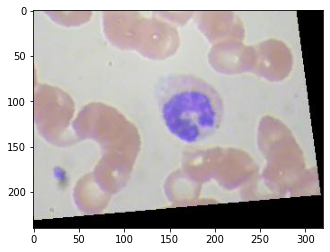

In [8]:
image_num = 31
print(labels[image_num])
plt.imshow(images[image_num].permute((1,2,0)));

In [9]:
type(images)

torch.Tensor

In [10]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3,6,5) # Input channels 3, output channels6, kernel size 5x5
        self.pool = torch.nn.MaxPool2d(2,2)
        self.conv2 = torch.nn.Conv2d(6,16,5)
        self.fc1 = torch.nn.Linear(70224, 120)
        self.fc2 = torch.nn.Linear(120,84)
        self.fc3 = torch.nn.Linear(84, 4)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f"[{epoch +1}, {i + 1:5d}] loss] {running_loss/200:.3f}")
            running_loss = 0.0
print("Training done")

[1,   200] loss] 1.338
[2,   200] loss] 1.333
Training done
